The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [168]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [169]:
# Loading the Train dataset

df_train=pd.read_csv('bigdatamart_train.csv')
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [170]:
# Loading the test dataset
df_test=pd.read_csv('bigdatamart_test.csv')
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [171]:
df_train.shape

(8523, 12)

In [172]:
df_test.shape

(5681, 11)

In [173]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [174]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [175]:
df_train['source'] = 'train'
df_test['source'] = 'test'

In [176]:
# Concading both training and testing data

data=pd.concat([df_train,df_test])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [177]:
data.shape

(14204, 13)

In [178]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [179]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [181]:
# Checking the Null value
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False,True,False
5677,False,False,False,False,False,False,False,False,False,False,False,True,False
5678,False,False,False,False,False,False,False,False,True,False,False,True,False
5679,False,False,False,False,False,False,False,False,True,False,False,True,False


In [182]:
data.isnull().sum() # Outliers is present in the dataset

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

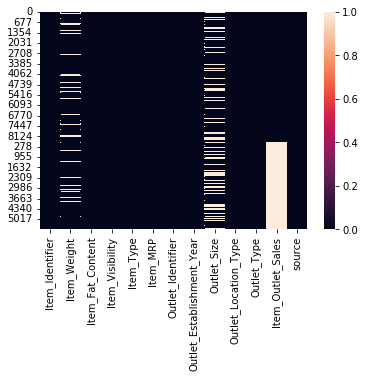

In [183]:
sns.heatmap(data.isnull())

Null value is present in Item_Weight,Outlet_Sales and Outlet_Size

In [184]:
data['Item_Weight'].count()

11765

In [185]:
data['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [186]:
data['Outlet_Size'].count()

10188

In [187]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [188]:
data['Item_Outlet_Sales'].count()

8523

In [189]:
data['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 3608.636 , 2778.3834,
             nan])

In [190]:
# Replace the Null value with mean

data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean())

In [191]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [192]:
# Remove the Outlet Size Column

data['Outlet_Size']=data.drop(columns='Outlet_Size',axis=1)

In [193]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

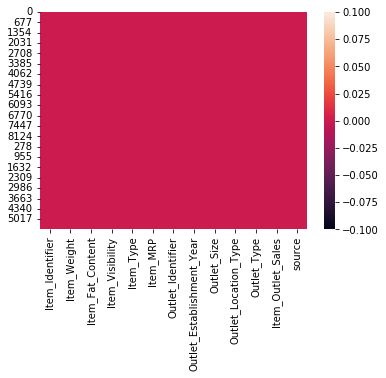

In [194]:
sns.heatmap(data.isnull())

In [195]:
# Checking the Correlation

data_corr=data.corr()
print(data_corr)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.013641  0.033002   
Item_Visibility              -0.013641         1.000000 -0.006351   
Item_MRP                      0.033002        -0.006351  1.000000   
Outlet_Establishment_Year     0.000462        -0.083678  0.000141   
Item_Outlet_Sales             0.008569        -0.099903  0.440979   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                 0.000462           0.008569  
Item_Visibility                            -0.083678          -0.099903  
Item_MRP                                    0.000141           0.440979  
Outlet_Establishment_Year                   1.000000          -0.038061  
Item_Outlet_Sales                          -0.038061           1.000000  


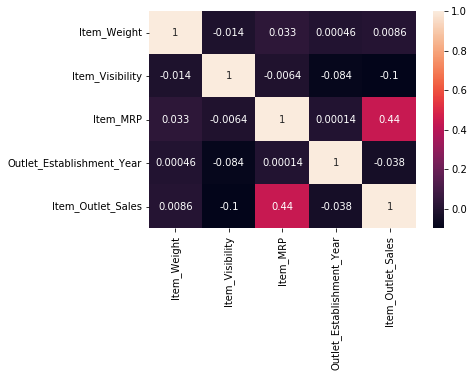

In [196]:
sns.heatmap(data_corr,annot=True)

In [197]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      2181.288914
std       1321.864430
min         33.290000
25%       1468.089000
50%       2181.288914
75%       2181.288914
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [198]:
print("Training Data:",df_train.shape,"\n","Test Data:", df_test.shape,"\n", "Combined train and test data:", data.shape)

Training Data: (8523, 13) 
 Test Data: (5681, 12) 
 Combined train and test data: (14204, 13)


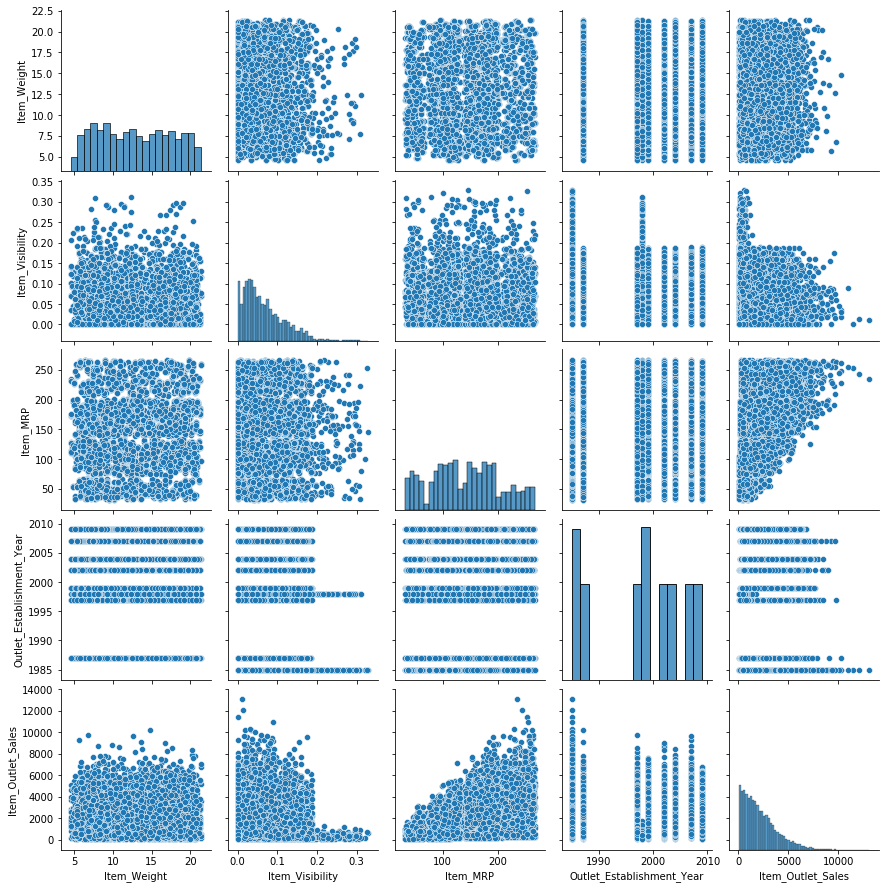

In [199]:
sns.pairplot(df_train)

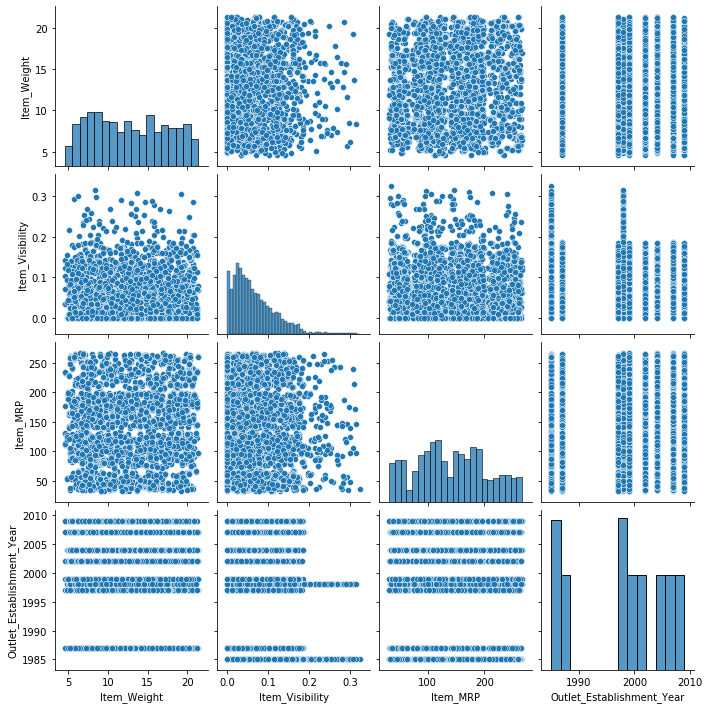

In [200]:
sns.pairplot(df_test)

In [201]:
categorical_feature=data.select_dtypes(include=[np.object])
categorical_feature.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,FDA15,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,DRC01,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,FDN15,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,FDX07,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,NCD19,Tier 3,Supermarket Type1,train


In [202]:
numerical_feature=data.select_dtypes(include=[np.float64])
numerical_feature.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

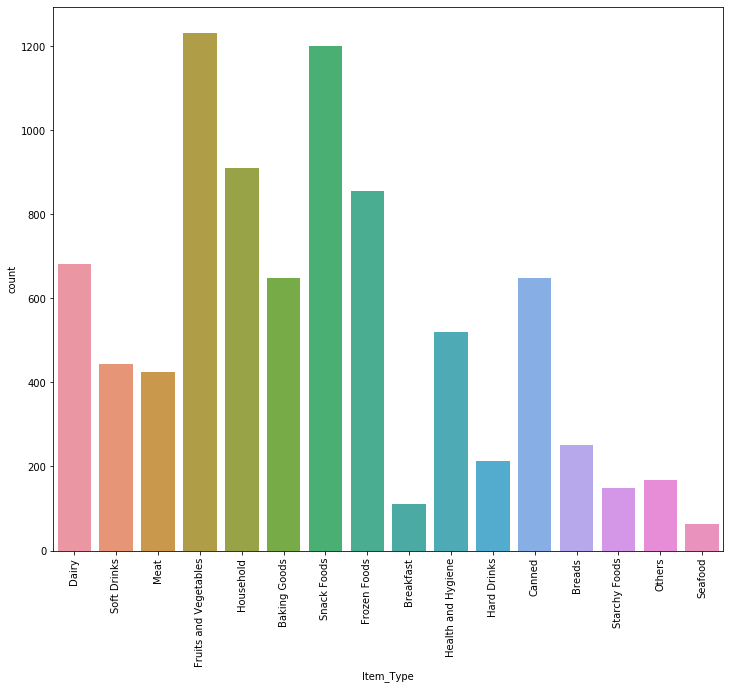

In [203]:
plt.figure(figsize=(12,10))
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

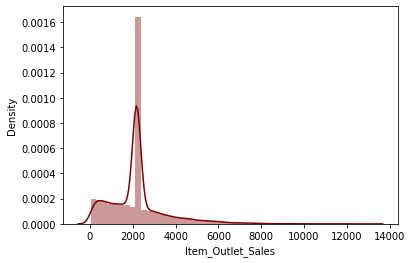

In [204]:
sns.distplot(data['Item_Outlet_Sales'],color='maroon')

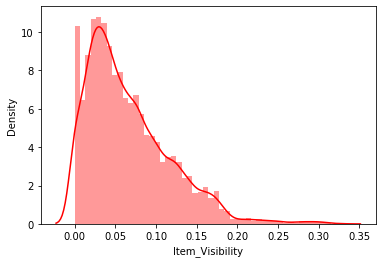

In [205]:
sns.distplot(data['Item_Visibility'],color='red')

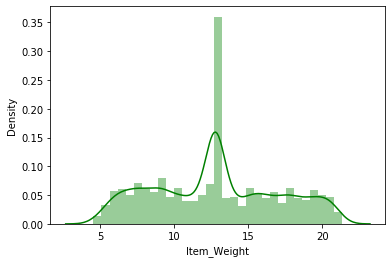

In [206]:
sns.distplot(data['Item_Weight'],color='green')

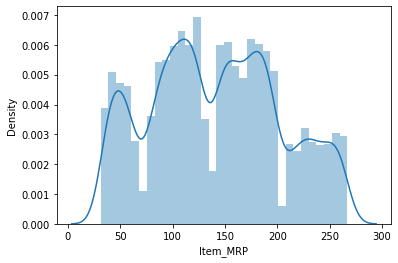

In [207]:
sns.distplot(data['Item_MRP'])

## Skewness

In [208]:
data.skew()

Item_Weight                  0.111314
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.520025
dtype: float64

In [209]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

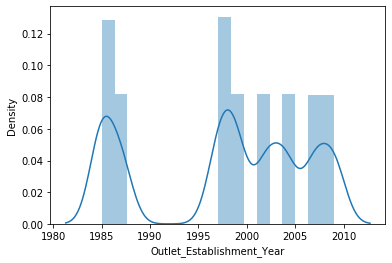

In [210]:
sns.distplot(data['Outlet_Establishment_Year'])

Item_Weight                     AxesSubplot(0.125,0.536818;0.227941x0.343182)
Item_Visibility              AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Item_MRP                     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Outlet_Establishment_Year          AxesSubplot(0.125,0.125;0.227941x0.343182)
Item_Outlet_Sales               AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

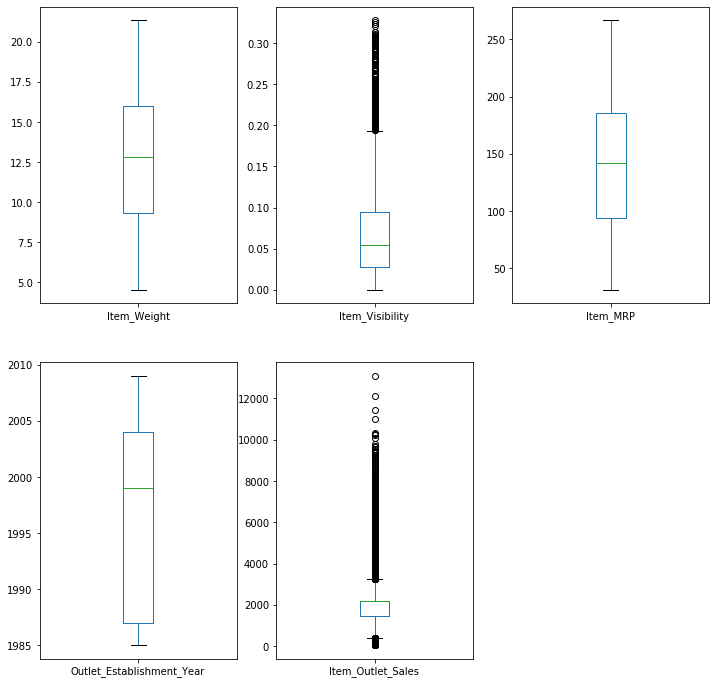

In [211]:
data.plot(kind='box',subplots=True, layout=(2,3), figsize=(12,12))

Outliers is present in Item_Visibility and Item_Outlet_Sales

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCFD1AC648>,
      dtype=object)

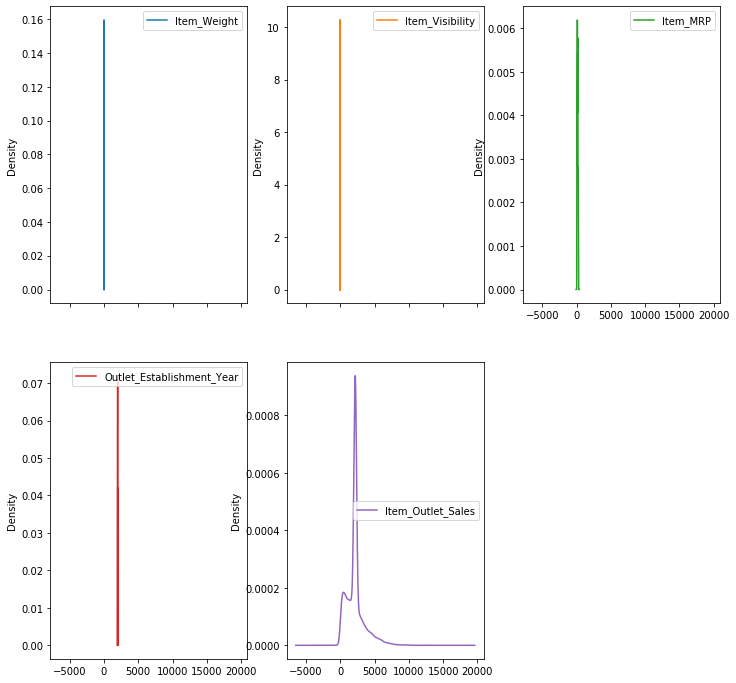

In [212]:
data.plot(kind='kde',subplots=True, layout=(2,3), figsize=(12,12))

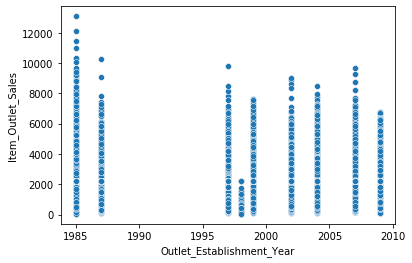

In [213]:
sns.scatterplot(x=data['Outlet_Establishment_Year'],y=data['Item_Outlet_Sales'])

In 1985 there is a increase in sales

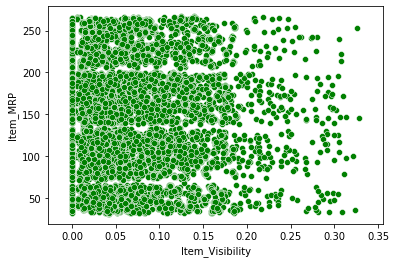

In [214]:
sns.scatterplot(x=data['Item_Visibility'],y=data['Item_MRP'], color='green')

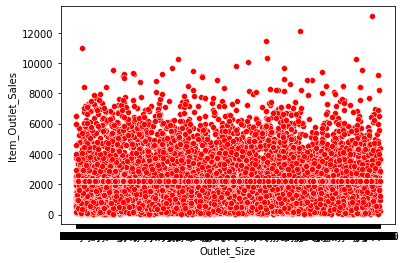

In [215]:
sns.scatterplot(x=data['Outlet_Size'],y=data['Item_Outlet_Sales'], color='red')

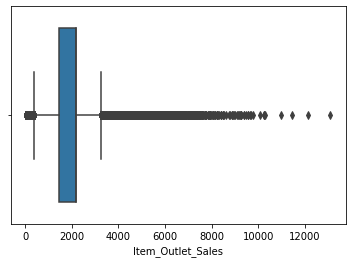

In [216]:
sns.boxplot(data['Item_Outlet_Sales'])

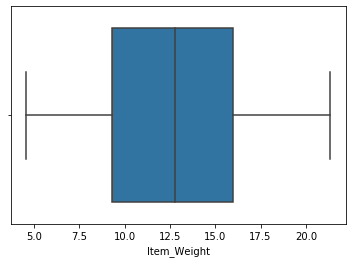

In [217]:
sns.boxplot(data['Item_Weight'])

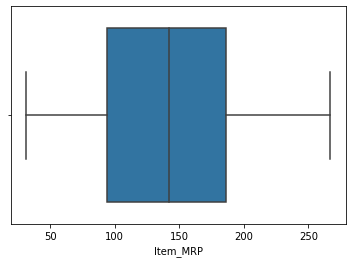

In [218]:
sns.boxplot(data['Item_MRP'])

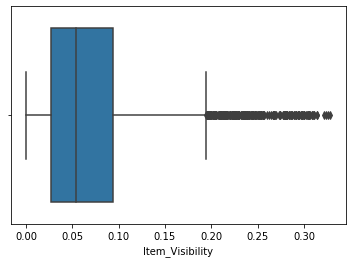

In [219]:
sns.boxplot(data['Item_Visibility'])

In [220]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].replace('Tier 3',value=1)
data['Outlet_Location_Type']=data['Outlet_Location_Type'].replace('Tier 2',value=2)
data['Outlet_Location_Type']=data['Outlet_Location_Type'].replace('Tier 1',value=3)

In [221]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,FDA15,3,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,DRC01,1,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,FDN15,3,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,FDX07,1,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,NCD19,1,Supermarket Type1,994.7052,train


In [222]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [223]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['Low Fat','LF','low fat'],value=0)
data['Item_Fat_Content']=data['Item_Fat_Content'].replace(['Regular','reg'],value=1)
data['Item_Fat_Content'].value_counts()

0    9185
1    5019
Name: Item_Fat_Content, dtype: int64

### Scaling the train data

In [224]:
x=train.drop(columns=['Item_Outlet_Sales','source'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,156,3,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,8,1,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,662,3,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1121,1,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,1297,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,370,1,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,897,2,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,1357,2,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,681,1,2


In [225]:
y=train['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [226]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
print(x_scaled)

[[-1.38851383 -0.83922588 -0.73814723 ... -1.38851383  1.36933384
  -0.25265831]
 [-1.71799137 -1.63904672  1.35474328 ... -1.71799137 -1.09156913
   1.00297245]
 [-0.26205684  1.10116786 -0.73814723 ... -0.26205684  1.36933384
  -0.25265831]
 ...
 [ 1.28515188 -0.53160248 -0.73814723 ...  1.28515188  0.13888236
  -0.25265831]
 [-0.21975905 -1.33378966  1.35474328 ... -0.21975905 -1.09156913
   1.00297245]
 [-1.62449099  0.46225773 -0.73814723 ... -1.62449099  1.36933384
  -0.25265831]]


### Label Encoder

In [227]:
from sklearn.preprocessing import LabelEncoder  # To change the categorical data to Numerical data

In [228]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [229]:
encoder=LabelEncoder()
data['Item_Identifier']=encoder.fit_transform(data['Item_Identifier'])
data['Item_Type']=encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']=encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']=encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Type']=encoder.fit_transform(data['Outlet_Type'])


In [230]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.30,0,0.016047,4,249.8092,9,1999,156,3,1,3735.1380,train
1,8,5.92,1,0.019278,14,48.2692,3,2009,8,1,2,443.4228,train
2,662,17.50,0,0.016760,10,141.6180,9,1999,662,3,1,2097.2700,train
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1121,1,0,732.3800,train
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1297,1,1,994.7052,train


In [231]:
data.shape

(14204, 13)

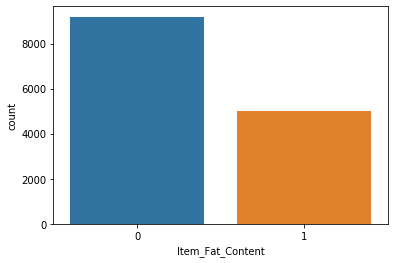

In [232]:
sns.countplot(data['Item_Fat_Content'])

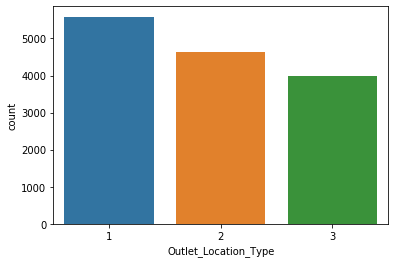

In [233]:
sns.countplot(data['Outlet_Location_Type'])

In [234]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [235]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,156,9.300,0,0.016047,4,249.8092,9,1999,156,3,1,3735.1380,train
1,8,5.920,1,0.019278,14,48.2692,3,2009,8,1,2,443.4228,train
2,662,17.500,0,0.016760,10,141.6180,9,1999,662,3,1,2097.2700,train
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1121,1,0,732.3800,train
4,1297,8.930,0,0.000000,9,53.8614,1,1987,1297,1,1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,370,1,1,2778.3834,train
8519,897,8.380,1,0.046982,0,108.1570,7,2002,897,2,1,549.2850,train
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,1357,2,1,1193.1136,train
8521,681,7.210,1,0.145221,13,103.1332,3,2009,681,1,2,1845.5976,train


In [236]:
train.drop(['source'],axis=1,inplace=True)

In [237]:
test.drop(['source'],axis=1,inplace=True)

In [238]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,156,3,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,8,1,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,662,3,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1121,1,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,1297,1,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,370,1,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,897,2,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,1357,2,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,681,1,2,1845.5976


In [239]:
x_train=train.drop(columns='Item_Outlet_Sales')
x_train.shape

(8523, 11)

In [240]:
y_train=train['Item_Outlet_Sales']
y_train.shape

(8523,)

In [241]:
x_test=test.drop(columns='Item_Outlet_Sales')
x_test.shape

(5681, 11)

In [242]:
y_test=test['Item_Outlet_Sales']
y_test.shape

(5681,)

## Model Buiding

#### Linear Regression

In [243]:


lr = LinearRegression(normalize=True)

lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [244]:
lr_predict=lr.predict(x_test)
lr_predict

array([1875.75189078, 1082.44006356, 2312.14894587, ..., 1746.1172378 ,
       3134.65014416, 1152.49224683])

In [245]:
lr.coef_

array([-5.21361751e-03, -4.84876947e-01,  5.77490582e+01, -1.74480942e+03,
       -9.33745644e-01,  1.55678114e+01,  5.67073345e+01, -3.62316882e+00,
       -5.21361751e-03,  6.62900173e+01,  8.49797960e+02])

In [246]:
lr.intercept_

5927.268978903712

In [247]:
lr.score(x_train,y_train)

0.5020822668611878

#### DecisionTreeRegressor

In [248]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(max_depth=12,min_samples_leaf=50)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=50)

In [249]:
dtr_pred=dtr.predict(x_test)
dtr_pred

array([1820.98735854, 1103.84451948,  628.57652368, ..., 1933.31058519,
       3501.20441429, 1366.01104786])

In [250]:
print("Accuracy score is",dtr.score(x_train,y_train))

Accuracy score is 0.6276147900737579


#### RandomForestRegressor

In [251]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [252]:
rfr_pred=rfr.predict(x_test)
rfr_pred

array([1712.830422, 1325.201662,  677.125258, ..., 1882.669344,
       4604.912488, 1500.173902])

In [253]:
print("Accuracy score is:",rfr.score(x_train,y_train))

Accuracy score is: 0.9375575067716475


#### SupportVectorRegressor

In [254]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [255]:
svr_pred=svr.predict(x_test)
svr_pred

array([1803.28309147, 1799.72900832, 1824.85962222, ..., 1813.48033318,
       1789.27390852, 1795.71198982])

In [256]:
print("Accuracy Score is:",svr.score(x_train,y_train))

Accuracy Score is: -0.04789433483633965


#### XGBRegressor

In [257]:
from xgboost import XGBRegressor

xgb=XGBRegressor(n_estimator=50,learning_rate=0.05)
xgb.fit(x_train,y_train)

[13:48:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimator=50, n_estimators=100,
             n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [258]:
xgb_pred=xgb.predict(x_test)
xgb_pred

array([1586.1528 , 1338.5541 ,  487.47577, ..., 1874.4504 , 3694.4563 ,
       1300.1929 ], dtype=float32)

In [259]:
print("Accuracy Score is:",xgb.score(x_train,y_train))

Accuracy Score is: 0.6732337579430916


### Hyper parameter tuning

In [266]:
grid_param={
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [267]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=dtr,param_grid=grid_param,cv=3,n_jobs=1,verbose=3)

In [ ]:
grid_search.fit(x_train,y_train)

In [269]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [270]:
grid_search.best_score_

0.5914001375498238

## Variance Inflation Factor

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]
vif['Features']=x_train.columns
vif

,VIF,Features
0,inf,Item_Identifier
1,10.276582,Item_Weight
2,1.601170,Item_Fat_Content
3,2.753417,Item_Visibility
4,4.040952,Item_Type
5,6.138949,Item_MRP
6,15.377806,Outlet_Identifier
7,46.739992,Outlet_Establishment_Year
8,inf,Outlet_Size
9,32.880784,Outlet_Location_Type


In [272]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_test,i) for i in range(x_test.shape[1])]
vif['Features']=x_test.columns
vif

,VIF,Features
0,inf,Item_Identifier
1,10.038032,Item_Weight
2,1.611468,Item_Fat_Content
3,2.748707,Item_Visibility
4,4.064797,Item_Type
5,6.242996,Item_MRP
6,15.381316,Outlet_Identifier
7,46.312742,Outlet_Establishment_Year
8,inf,Outlet_Size
9,32.874015,Outlet_Location_Type


## Cross Validation

In [273]:
# Cross Validation in RandomForestRegressor
score=cross_val_score(rfr,x_train,y_train,cv=5)
print("Cross Validation Score in Random Forest Classifier is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")

Cross Validation Score in Random Forest Classifier is:
 [0.56470446 0.53770739 0.5297142  0.55560608 0.56239604] 

Cross Validation Mean is: 0.5500256343608847
Cross Validation Standard Deviation is: 0.013884737865694984 



In [274]:
# Cross Validation in LinearRegression
score=cross_val_score(lr,x_train,y_train,cv=5)
print("Cross Validation Score in Linear Regression is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")

Cross Validation Score in Linear Regression is:
 [0.51599787 0.50516656 0.48226797 0.49850348 0.49824081] 

Cross Validation Mean is: 0.5000353380417957
Cross Validation Standard Deviation is: 0.01097613804025721 



In [275]:
# Cross Validation in XGBRegressor
score=cross_val_score(xgb,x_train,y_train,cv=5)
print("Cross Validation Score in XGB Regressor is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")

[13:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This c

In [276]:
# Cross Validation in Support Vector Regressor
score=cross_val_score(svr,x_train,y_train,cv=5)
print("Cross Validation Score in Support Vector Regressor is:\n",score,"\n")
print("Cross Validation Mean is:",score.mean())
print("Cross Validation Standard Deviation is:",score.std(),"\n")

Cross Validation Score in Support Vector Regressor is:
 [-0.05451222 -0.03677034 -0.06392374 -0.04841132 -0.04223741] 

Cross Validation Mean is: -0.04917100636054976
Cross Validation Standard Deviation is: 0.009472067345129995 



In [277]:
print("Predict Value:\n",rfr_pred,"\n")  #In Random Forest Regressor
print("Actual Value:\n",y_test)

Predict Value:
 [1712.830422 1325.201662  677.125258 ... 1882.669344 4604.912488
 1500.173902] 

Actual Value:
 0       2181.288914
1       2181.288914
2       2181.288914
3       2181.288914
4       2181.288914
           ...     
5676    2181.288914
5677    2181.288914
5678    2181.288914
5679    2181.288914
5680    2181.288914
Name: Item_Outlet_Sales, Length: 5681, dtype: float64


In [278]:
print("Predict Value:\n",lr_predict,"\n")  #In Linear Regression
print("Actual Value:\n",y_test) 

Predict Value:
 [1875.75189078 1082.44006356 2312.14894587 ... 1746.1172378  3134.65014416
 1152.49224683] 

Actual Value:
 0       2181.288914
1       2181.288914
2       2181.288914
3       2181.288914
4       2181.288914
           ...     
5676    2181.288914
5677    2181.288914
5678    2181.288914
5679    2181.288914
5680    2181.288914
Name: Item_Outlet_Sales, Length: 5681, dtype: float64


In [279]:
print("Predict Value:\n",xgb_pred,"\n")  #In XGB Regressor
print("Actual Value:\n",y_test) 

Predict Value:
 [1586.1528  1338.5541   487.47577 ... 1874.4504  3694.4563  1300.1929 ] 

Actual Value:
 0       2181.288914
1       2181.288914
2       2181.288914
3       2181.288914
4       2181.288914
           ...     
5676    2181.288914
5677    2181.288914
5678    2181.288914
5679    2181.288914
5680    2181.288914
Name: Item_Outlet_Sales, Length: 5681, dtype: float64


In [280]:
print("Predict Value:\n",dtr_pred,"\n")  #In Decision Tree Regressor
print("Actual Value:\n",y_test) 

Predict Value:
 [1820.98735854 1103.84451948  628.57652368 ... 1933.31058519 3501.20441429
 1366.01104786] 

Actual Value:
 0       2181.288914
1       2181.288914
2       2181.288914
3       2181.288914
4       2181.288914
           ...     
5676    2181.288914
5677    2181.288914
5678    2181.288914
5679    2181.288914
5680    2181.288914
Name: Item_Outlet_Sales, Length: 5681, dtype: float64


### Saving the Model

In [281]:
import pickle
filename="Big_Data_Mart_Sales.pickle"
pickle.dump(rfr, open(filename,'wb'))

In [282]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([1712.830422, 1325.201662,  677.125258, ..., 1882.669344,
       4604.912488, 1500.173902])